In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.neighbors import KNeighborsClassifier

C:\Users\DELL.E5430.SSD\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


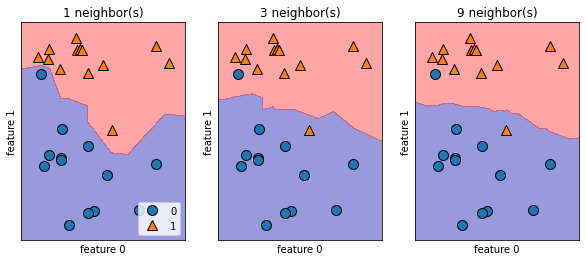

In [28]:
_Xc, _Yc = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,3, figsize=(10,4))

for i, ax in zip([1,3,9], axes):
    
    clf = KNeighborsClassifier(n_neighbors=i).fit(_Xc, _Yc)
    
    mglearn.plots.plot_2d_separator(clf, _Xc, eps=.5, alpha=.4, ax=ax, fill=True)
    
    mglearn.discrete_scatter(_Xc[:,0], _Xc[:,1], _Yc, ax=ax)
    
    ax.set_title('{} neighbor(s)'.format(i))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend(loc=4)

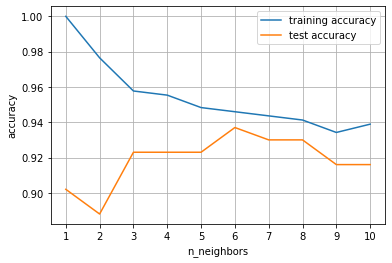

In [45]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for i in neighbors_settings:
    
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend(loc=1)
plt.grid()
plt.xticks(neighbors_settings)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()


In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
_Xr, _Yr = mglearn.datasets.make_wave(n_samples=40)

_xtrain, _xtest, _ytrain, _ytest = train_test_split(_Xr, _Yr, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(_xtrain, _ytrain)

# Predicimos xtest

reg.predict(_xtest)

#score of our algoritm

reg.score(_xtest, _ytest)

0.8344172446249605

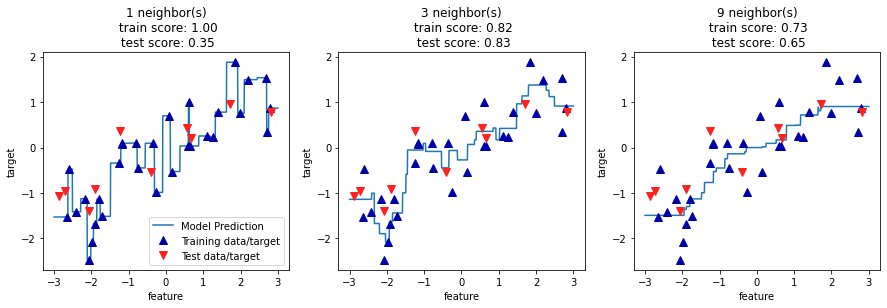

In [93]:
# Analizaremos kneighborsRegresor

# creamos las fiduras

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# creamos 1000 puntos en un rango de -3,3\
line = np.linspace(-3,3,1000).reshape(-1,1)
#line.shape #con reshape(-1,1) hacemos que nuestro line, tengo 1 columna,
#convertimos a una matriz de nx1(como convertirlo de fila a culumna)

#analizamos para [1,3,9] nears neighbors

for n_neighbors, ax in zip([1,3,9], axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(_xtrain, _ytrain) #entrenamos el algoritmo
    
    ax.plot(line,reg.predict(line)) #graficamos en las hojas la prediccion y la linea no se
    
    
    ax.plot(_xtrain, _ytrain, '^', c=mglearn.cm2(0), markersize=8)
    # MARCANDO LOS POINTS IF THE TRAINING DATASET
    #solo con(_xtrain,_ytrain), grafica la recta pendiente de cada punto predict
    # con el caracter '^', elimina las lineas y pone este caracte en ese punto
    #por ahora solo se que c=mglearn.cm2() cambia de color los npoints, 0-azulm 1++ = rojo
    #markersize = aumenta el tamano de los puntos
    
    ax.plot(_xtest, _ytest, 'v', c=mglearn.cm2(1), markersize=8)
    #las mismas caracteristicas de arriba
    
    ax.set_title('{} neighbor(s)\n train score: {:.2f}\n test score: {:.2f}'.format(n_neighbors, reg.score(_xtrain, _ytrain),reg.score(_xtest, _ytest)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    
axes[0].legend(['Model Prediction', 'Training data/target','Test data/target'], loc='best')